In [30]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt

import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model

from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [31]:
df = pd.read_csv('ecg.csv',sep=',',header=None)
df
#1 for normal, 0 for abnormal

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [32]:
df.columns

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
      dtype='int64', length=141)

In [33]:
#Do colum processing
df = df.add_prefix('c')


In [34]:
df['c140'].value_counts()

c140
1.0    2919
0.0    2079
Name: count, dtype: int64

In [20]:
#How data looks like
#df.describe()

In [50]:
#spilt data using sklearn, train data with label now to spilt later
train_data, test_data, train_labels, test_labels = train_test_split(df, df['c140'], test_size=0.2, random_state=111)

In [51]:
#scaling data, becasue neural network works better with scaled data
scaler = MinMaxScaler()
#transform data
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.fit_transform(test_data)


In [54]:
#exclude letzte column
normal_train_data_scaled = pd.DataFrame(train_data_scaled).add_prefix('c').query('c140 == 1').values[:,:-1]
abnormal_train_data_scaled = pd.DataFrame(train_data_scaled).add_prefix('c').query('c140 == 0').values[:,:-1]

normal_test_data_scaled = pd.DataFrame(test_data_scaled).add_prefix('c').query('c140 == 1').values[:,:-1]
abnormal_test_data_scaled = pd.DataFrame(test_data_scaled).add_prefix('c').query('c140 == 0').values[:,:-1]



normal_train_data

In [55]:
print("Normal train data: ", normal_train_data_scaled.shape)
print("Normal test data: ", normal_test_data_scaled.shape)
print("Abnormal train data: ", abnormal_train_data_scaled.shape)
print("Abnormal test data: ", abnormal_test_data_scaled.shape)

Normal train data:  (2354, 140)
Normal test data:  (565, 140)
Abnormal train data:  (1644, 140)
Abnormal test data:  (435, 140)


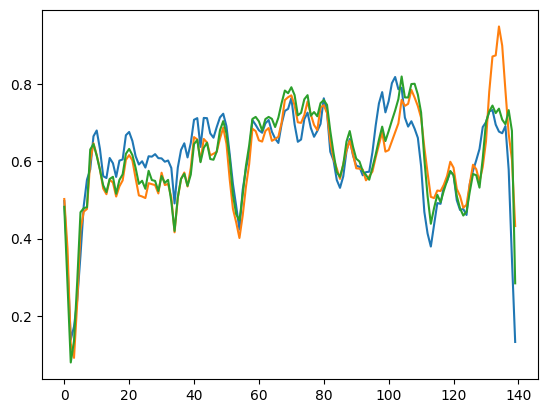

In [56]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[1])
plt.plot(normal_train_data_scaled[2])

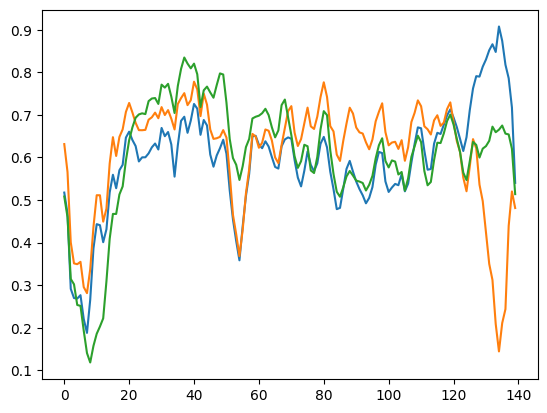

In [57]:
#see abnormal data ecg
plt.plot(abnormal_train_data_scaled[0])
plt.plot(abnormal_train_data_scaled[1])
plt.plot(abnormal_train_data_scaled[2])

In [43]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(140, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded
    

In [45]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')


In [58]:
#unsurpervised learning, so we will pass some dummy values
#validate: try also to separate normal and abnormal data, why passing all data both normal and abnormal train_data_scaled  
#shuffle: meaning and lstm not shuffle
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=50, batch_size=512, 
                    validation_data=(train_data_scaled[:,:-1], train_data_scaled[:,:-1]), 
                    shuffle=True, callbacks=[early_stopping])
#20:30,19:40

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1269 - val_loss: 0.1244
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1137 - val_loss: 0.1106
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0992 - val_loss: 0.0987
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0853 - val_loss: 0.0882
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0715 - val_loss: 0.0816
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0615 - val_loss: 0.0787
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0556 - val_loss: 0.0771
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0517 - val_loss: 0.0761
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0498 - val_loss: 0.0753
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0482 - val_loss: 0.0746
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0465 - val_loss: 0.0741
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0465 - val_loss: 0.0735
E

In [59]:
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 140 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [60]:
encoder_out.shape

(565, 8)

In [61]:
decoder_out.shape

(565, 140)

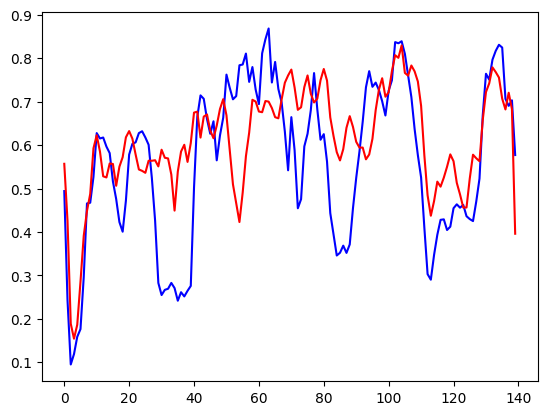

In [62]:
#notmal data
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

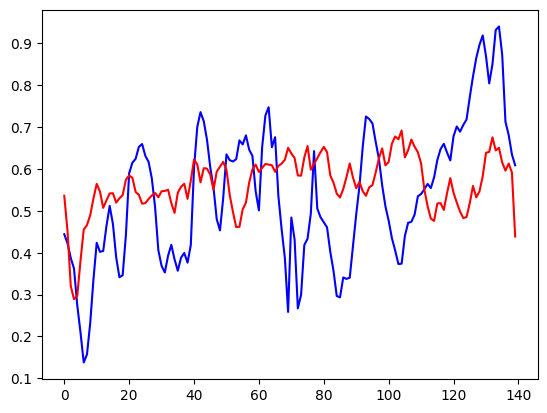

In [63]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 3.,  2.,  6., 10., 26., 43., 34., 65., 71., 70., 38., 36., 34.,
        20., 17., 13., 13., 14.,  8.,  7.,  5.,  5.,  3.,  4.,  2.,  2.,
         1.,  0.,  4.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.10812597, 0.10990805, 0.11169013, 0.11347221, 0.11525429,
        0.11703637, 0.11881845, 0.12060053, 0.12238261, 0.1241647 ,
        0.12594678, 0.12772886, 0.12951094, 0.13129302, 0.1330751 ,
        0.13485718, 0.13663926, 0.13842134, 0.14020342, 0.1419855 ,
        0.14376758, 0.14554966, 0.14733174, 0.14911382, 0.1508959 ,
        0.15267799, 0.15446007, 0.15624215, 0.15802423, 0.15980631,
        0.16158839, 0.16337047, 0.16515255, 0.16693463, 0.16871671,
        0.17049879, 0.17228087, 0.17406295, 0.17584503, 0.17762711,
        0.1794092 , 0.18119128, 0.18297336, 0.18475544, 0.18653752,
        0.1883196 , 0.19010168, 0.19188376, 0.19366584, 0.19544792,
        0.19723   ]),
 <BarContainer

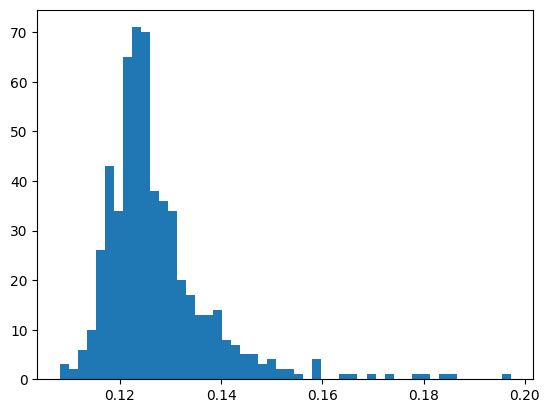

In [67]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)

plt.hist(train_loss, bins=50)

In [68]:
np.mean(train_loss)

np.float64(0.12714694888806094)

In [69]:
np.std(train_loss)

np.float64(0.010653622785611624)

In [70]:
threadshold = np.mean(train_loss) + 2*np.std(train_loss)

In [71]:
threadshold

np.float64(0.14845419445928418)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 1.,  0.,  1.,  0.,  3., 22., 25., 37., 28., 27., 38., 36., 34.,
        21., 17., 29., 28., 13., 13., 15., 11., 10.,  7.,  5.,  2.,  4.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.10355192, 0.10642049, 0.10928905, 0.11215762, 0.11502618,
        0.11789475, 0.12076332, 0.12363188, 0.12650045, 0.12936901,
        0.13223758, 0.13510614, 0.13797471, 0.14084327, 0.14371184,
        0.1465804 , 0.14944897, 0.15231754, 0.1551861 , 0.15805467,
        0.16092323, 0.1637918 , 0.16666036, 0.16952893, 0.17239749,
        0.17526606, 0.17813463, 0.18100319, 0.18387176, 0.18674032,
        0.18960889, 0.19247745, 0.19534602, 0.19821458, 0.20108315,
        0.20395171, 0.20682028, 0.20968885, 0.21255741, 0.21542598,
        0.21829454, 0.22116311, 0.22403167, 0.22690024, 0.2297688 ,
        0.23263737, 0.23550594, 0.2383745 , 0.24124307, 0.24411163,
        0.2469802 ]),
 <BarContainer

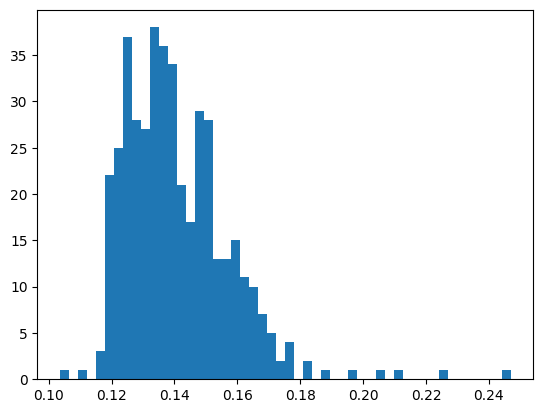

In [73]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
test_loss = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)

plt.hist(test_loss, bins=50)


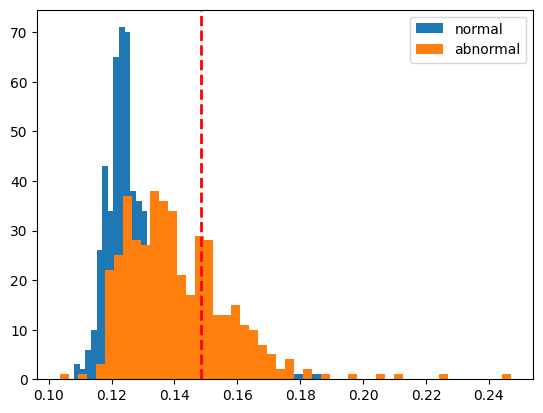

In [74]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(test_loss, bins=50, label='abnormal')
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = 'threadshold')
plt.show()